In [6]:
# Import Dependencies
from lib.ConnectorDB import DBConnection
from pandasai import SmartDataframe
from pandasai.llm import OpenAI
from pandasai.connectors import SQLConnector
from pandasai import SmartDatalake
import logging.config
import logging.handlers
import json
# Configure logging
logging.config.fileConfig('../parameters/logs.ini', disable_existing_loggers=False)
logger = logging.getLogger(__name__)
logging.getLogger("paramiko").setLevel(logging.WARNING)

# Establish database connection
config_file = ('../parameters/config.json')
nt_conn = DBConnection(config_file)
nt_conn.neutrino()

# Extract data from the database
customers = nt_conn.extract_data('''SELECT * FROM Customers''')
orders = nt_conn.extract_data('''SELECT * FROM Orders''')
lineitems = nt_conn.extract_data('''SELECT * FROM LineItems''')

# Print the number of rows extracted for each DataFrame
print(f"Number of rows in 'customers': {customers.shape[0]}")
print(f"Number of rows in 'orders': {orders.shape[0]}")
print(f"Number of rows in 'lineitems': {lineitems.shape[0]}")

# Close the database connection
nt_conn.close()

Number of rows in 'customers': 156
Number of rows in 'orders': 200
Number of rows in 'lineitems': 597


In [7]:
# Setting Up PandasAI
with open(config_file) as config:
    param = json.load(config)
api_key = param['OpenAI_API']

# Select LLM
llm = OpenAI(api_token=api_key)

# Create smart data lake
lake = SmartDatalake(
    [customers, orders],
    config={"llm": llm}
)
lake.chat("Give me top 10 customers with highest orders placed?")

CustomerName  OrderCount
132  Customer_474           3
149   Customer_79           3
143   Customer_65           3
54    Customer_25           3
120  Customer_436           3
59   Customer_274           3
71   Customer_293           2
81   Customer_327           2
79   Customer_320           2
1    Customer_100           2

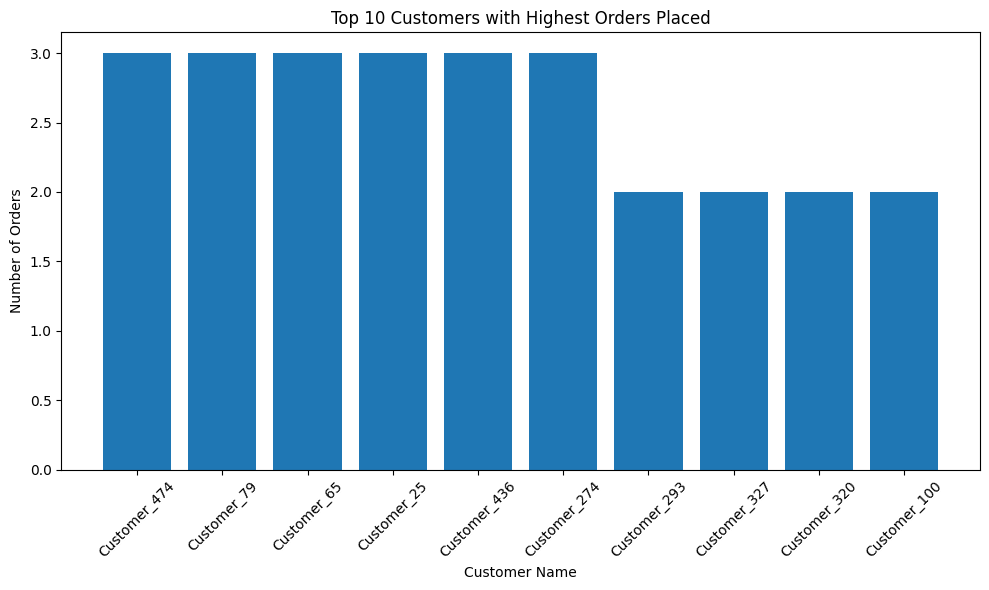

'C:/Users/slavp/PycharmProjects/Hierarchical-Autonomous-Agent-Swarm/exports/charts/temp_chart.png'

In [8]:
lake.chat("Plot top 10 customers with highest orders placed?")

In [ ]:
import pyodbc
import pandas as pd
import json

# Read the configuration file
with open('../parameters/config.json') as config_file:
    config = json.load(config_file)

class DBConnector:
    def __init__(self, config):
        self.config = config["Neutrino"]
        self.connection_string = f"DRIVER={self.config['driver']};" \
                                 f"SERVER={self.config['server']};" \
                                 f"DATABASE={self.config['database']};" \
                                 f"UID={self.config['username']};" \
                                 f"PWD={self.config['password']};" \
                                 f"Encrypt={self.config['encrypt']};" \
                                 f"TrustServerCertificate={self.config['trust_server_certificate']};" \
                                 f"Connection Timeout={self.config['connection_timeout']}"

    def connect(self):
        self.connection = pyodbc.connect(self.connection_string)
        return self.connection

    def execute_query(self, query):
        with self.connect() as conn:
            return pd.read_sql(query, conn)
# Example usage
db_connector = DBConnector(config)

# Example query to extract data
extracted_data = db_connector.execute_query("SELECT * FROM Orders")


extracted_data